## Experiment 2 - influence of percentage visited per user on nDCG

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [23]:
Path = "../results/result_full Dataset_Ex2/"
ds = "gowalla"
alg = "STACP"
df_100 = pd.read_csv(Path+"result_top_20_100.txt", sep = "\t", header = None)
df_100.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_80 = pd.read_csv(Path+"result_top_20_80.txt", sep = "\t", header = None)
df_80.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60 = pd.read_csv(Path+"result_top_20_60.txt", sep = "\t", header = None)
df_60.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_40 = pd.read_csv(Path+"result_top_20_40.txt", sep = "\t", header = None)
df_40.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

In [39]:
ex2 = pd.DataFrame(columns = ["dataset","algorithm", "visited","nDCG", "map"]) 
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':40,'nDCG':df_40["ndcg"].mean(),  'map':df_40["map"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':60,'nDCG':df_60["ndcg"].mean(),  'map':df_60["map"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':80,'nDCG':df_80["ndcg"].mean(),  'map':df_80["map"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':100,'nDCG':df_100["ndcg"].mean(),  'map':df_100["map"].mean()}, ignore_index=True)


In [40]:
ex2

,dataset,algorithm,visited,nDCG,map
0,gowalla,STACP,40,0.028952,0.015974
1,gowalla,STACP,60,0.031180,0.017743
2,gowalla,STACP,80,0.034059,0.019537
3,gowalla,STACP,100,0.036401,0.021671


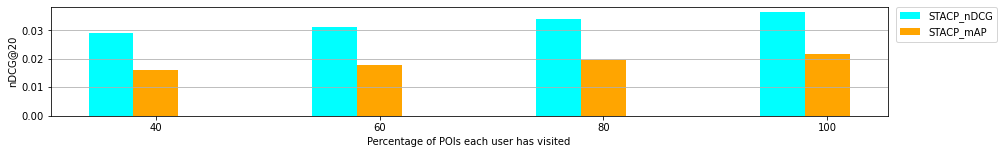

In [49]:
# create data 
x = np.arange(4) 
y1 = ex2.nDCG
y2 = ex2.map
y3 = ex2.nDCG
width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,2));

plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x, y2, width, color='orange') 
#plt.bar(x+0.2, y3, width, color='green') 
plt.xticks(x, ['40', '60','80', '100']) 
plt.legend(["STACP_nDCG", "STACP_mAP", "Round 3"], bbox_to_anchor=(1.01, 1),borderaxespad=0) 
plt.xlabel("Percentage of POIs each user has visited") 
plt.ylabel("nDCG@20") 
plt.grid(axis = 'y')
plt.show() 

In [14]:
df_100.mean()

cnt     2813.500000
uid     2813.500000
prec       0.032578
rec        0.066694
ndcg       0.036401
map        0.021671
dtype: float64

In [18]:
print(stats.ttest_1samp(df_100["prec"],0.0146))
print(stats.ttest_1samp(df_100["rec"],0.0270))
print(stats.ttest_1samp(df_100["ndcg"],0.0079))

Ttest_1sampResult(statistic=26.13188265167397, pvalue=3.586215542013316e-142)
Ttest_1sampResult(statistic=24.996222490347336, pvalue=7.376677438656684e-131)
Ttest_1sampResult(statistic=34.82950904126524, pvalue=7.225210493794448e-241)


0.040920421588774174